In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [425]:
train = pd.read_csv("bank_train.csv")
test = pd.read_csv("bank_test.csv")

In [426]:
train.shape

(31647, 18)

In [427]:
test.shape

(13564, 17)

In [428]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [429]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [430]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [431]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [432]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [433]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [434]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [435]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [436]:
train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

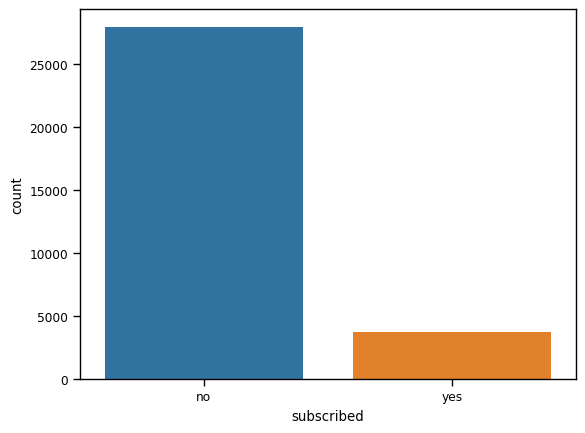

In [437]:
sns.countplot(data=train, x='subscribed')

In [438]:
train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

In [439]:
train['job'].value_counts()

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

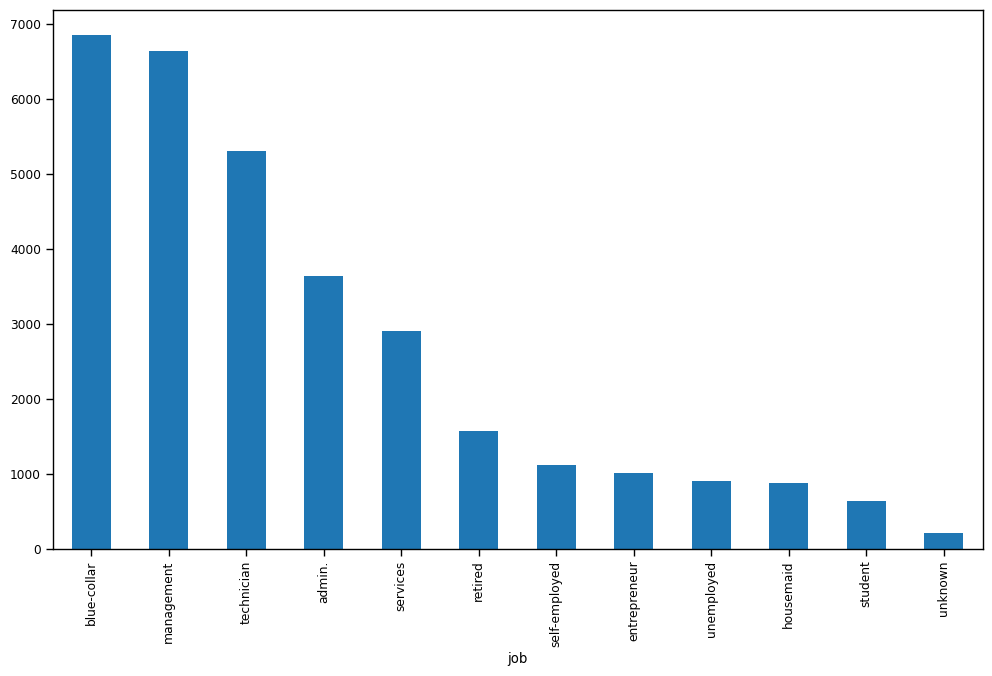

In [440]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(12,7));

In [441]:
train['marital'].value_counts()

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

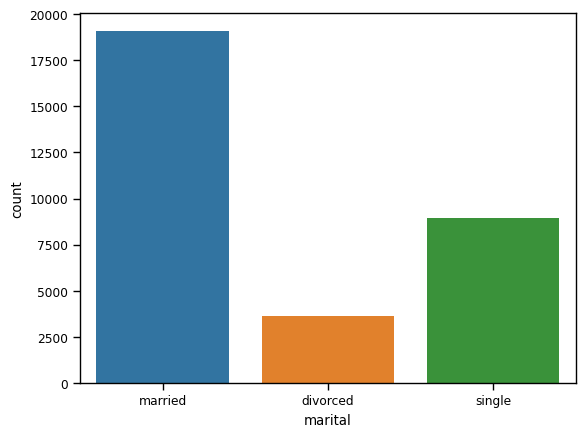

In [442]:
sns.countplot(data=train, x='marital');

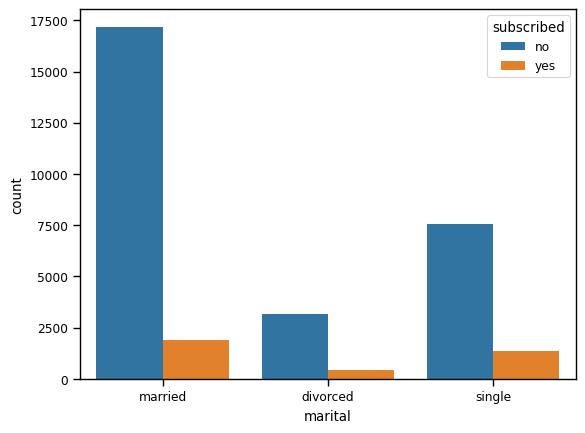

In [443]:
sns.countplot(data=train, x='marital', hue='subscribed');

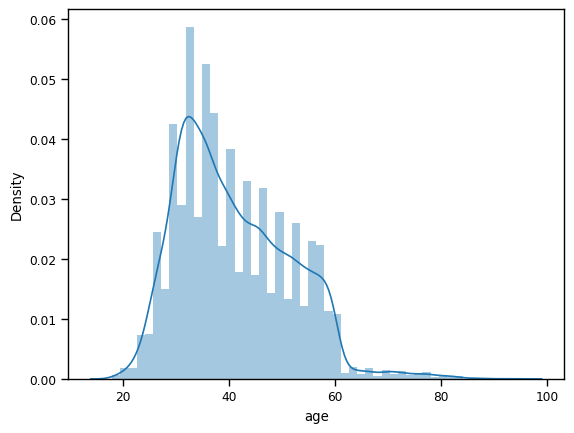

In [444]:
sns.distplot(train['age']);

In [445]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [446]:
job = pd.crosstab(train['job'],train['subscribed'])
jobn = job.div(job.sum(1).astype(float), axis=0)

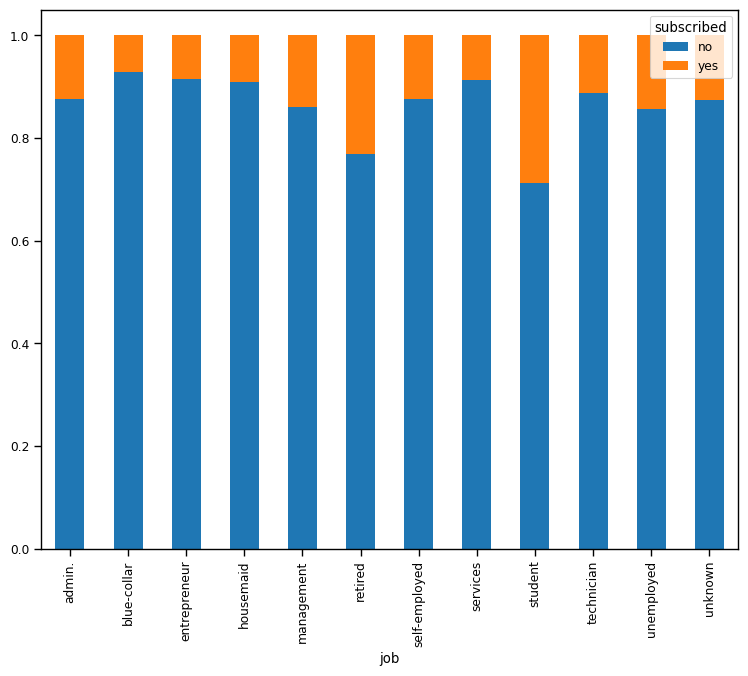

In [447]:
jobn.plot.bar(stacked=True,figsize=(9,7));

In [448]:
marital = pd.crosstab(train['marital'], train['subscribed'])
maritalnum = marital.div(marital.sum(1).astype(float), axis=0)
maritalnum

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


<Axes: xlabel='marital'>

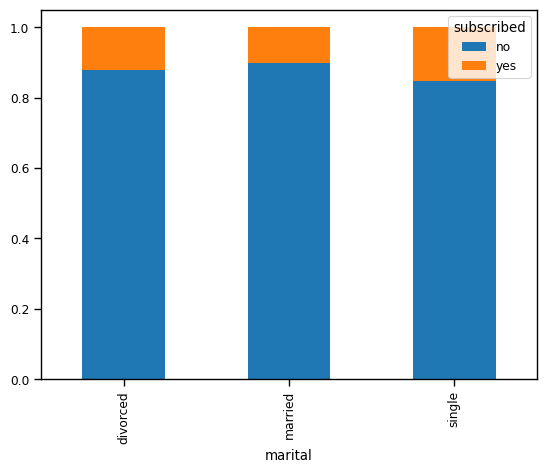

In [449]:
maritalnum.plot.bar(stacked=True)

In [450]:
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [451]:
df1 = pd.crosstab(train['default'], train['subscribed'])
df_num = df1.div(df1.sum(1).astype(float), axis=0)
df_num

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

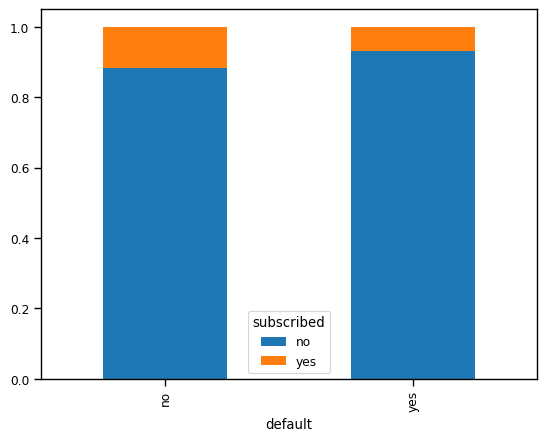

In [452]:
df_num.plot.bar(stacked=True)

In [453]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [454]:
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [455]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)


In [456]:
from sklearn.preprocessing import LabelEncoder
for col in train.columns:
    label = LabelEncoder()
    train[col] = label.fit_transform(train[col])

In [457]:
train = pd.get_dummies(train)
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,18299,38,0,1,3,0,2719,0,0,1,18,9,43,1,0,0,3
1,28379,13,11,1,1,0,822,0,0,0,19,5,90,1,0,0,3
2,10766,9,7,1,1,0,1709,1,0,0,17,5,239,0,0,0,3
3,30772,39,4,0,2,0,3815,0,0,0,21,6,864,0,79,3,2
4,20922,13,9,1,1,0,938,1,0,0,3,3,379,0,0,0,3


In [458]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [459]:
X_train,X_test,Y_train,Y_test = train_test_split(train,target,test_size = 0.2, random_state = 12)

In [460]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)
predsvc = svc.predict(X_test)

print('Test_Accuracy', accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))


Test_Accuracy 0.8856240126382307
[[5604    4]
 [ 720    2]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5608
           1       0.33      0.00      0.01       722

    accuracy                           0.89      6330
   macro avg       0.61      0.50      0.47      6330
weighted avg       0.82      0.89      0.83      6330



In [461]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

para = {'n_neighbors':[1,2,3,4,5,6,7],
        'weights' : ['uniform','distance'],
       }
knn = KNeighborsClassifier()
cl = GridSearchCV(knn,para,cv=5, scoring = 'accuracy')
cl.fit(X_train,Y_train)

print(cl.best_params_)
print(cl.best_score_)

{'n_neighbors': 7, 'weights': 'distance'}
0.8979737846577048


In [462]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, weights = 'distance')
knn.fit(X_train,Y_train)
predkn = knn.predict(X_test)

print('Test_Accuracy', accuracy_score(Y_test,predkn))
print(confusion_matrix(Y_test,predkn))
print(classification_report(Y_test,predkn))

Test_Accuracy 0.8924170616113745
[[5357  251]
 [ 430  292]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5608
           1       0.54      0.40      0.46       722

    accuracy                           0.89      6330
   macro avg       0.73      0.68      0.70      6330
weighted avg       0.88      0.89      0.89      6330



In [463]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
predlr = lr.predict(X_test)
pred_trainlr = lr.predict(X_train)
print('Test_Accuracy', accuracy_score(Y_test,predlr))
print('Train_Accuracy', accuracy_score(Y_train,pred_trainlr))
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

Test_Accuracy 0.8791469194312796
Train_Accuracy 0.8806335663783229
[[5415  193]
 [ 572  150]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5608
           1       0.44      0.21      0.28       722

    accuracy                           0.88      6330
   macro avg       0.67      0.59      0.61      6330
weighted avg       0.85      0.88      0.86      6330



In [464]:
from sklearn.tree import DecisionTreeClassifier

In [465]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [466]:
predict = clf.predict(X_test)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [467]:
accuracy_score(Y_test,predict)

0.9033175355450237

In [472]:
import pickle
filename = 'Bank_Marketing.pkl'
pickle.dump(clf,open(filename,'wb'))

In [473]:
loaded_model = pickle.load(open(filename, 'rb'))

In [474]:
loaded_model

DecisionTreeClassifier(max_depth=4, random_state=0)

In [476]:
result = loaded_model.score(X_test,Y_test)
print(result*100)

90.33175355450237
